<a href="https://colab.research.google.com/github/vaishnavey/CIA_PLCP_analysis/blob/main/plcp_pyros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyrosettacolabsetup
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
import pyrosetta; pyrosetta.init()

Mounted at /content/google_drive

Note that USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE.
See https://github.com/RosettaCommons/rosetta/blob/main/LICENSE.md or email license@uw.edu for details.

Looking for compatible PyRosetta wheel file at google-drive/PyRosetta/colab.bin//wheels...
Found compatible wheel: /content/google_drive/MyDrive/PyRosetta/colab.bin/wheels//content/google_drive/MyDrive/PyRosetta/colab.bin/wheels/pyrosetta-2025.45+release.d79cb06334-cp312-cp312-linux_x86_64.whl


┌───────────────────────────────────────────────────────────────────────────────┐
│                                  PyRosetta-4                                  │
│               Created in JHU by Sergey Lyskov and PyRosetta Team              │
│               (C) Copyright Rosetta Commons Member Institutions               │
│                                                                               │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRES PURCHASE OF A 

In [10]:
from pyrosetta import *
init()

┌───────────────────────────────────────────────────────────────────────────────┐
│                                  PyRosetta-4                                  │
│               Created in JHU by Sergey Lyskov and PyRosetta Team              │
│               (C) Copyright Rosetta Commons Member Institutions               │
│                                                                               │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRES PURCHASE OF A LICENSE │
│          See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└───────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2025 [Rosetta PyRosetta4.MinSizeRel.python312.ubuntu 2025.45+release.d79cb06334818403e40289334138fb126753c253 2025-11-04T12:19:41] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python312.ubuntu r416 2025.45+release.d79cb06

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd drive/MyDrive/plcps

[Errno 2] No such file or directory: 'drive/MyDrive/plcps'
/content/drive/MyDrive/plcps


In [12]:
from pyrosetta.toolbox import rcsb


In [ ]:
pose1= rcsb.pose_from_rcsb('3kw0')

core.import_pose.import_pose: File '3KW0.clean.pdb' automatically determined to be of type PDB from contents.
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 21
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 21
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE1 on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE3 on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ2 on residue TRP 54
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ3 on residue TRP 54
core.conformation.Conformation

In [13]:
scorefxn = get_fa_scorefxn()   # this is ref2015 by default

# Score the pose
score = scorefxn(pose1)
print("Total score:", score)

# If you want per-residue scores:
pose1.energies().show()

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard res

NameError: name 'pose1' is not defined

In [ ]:
plcp_list= ['1BY8', '1CS8', '1PAD', '2PAD', '3EBQ', '3IFU', '3KW0', '3PFY', '3RNV', '3TNX', '4PAD', '5CRA', '5JT8', '5LWA', '5MU9', '5PAD', '6PAD', '9PAP']

In [ ]:
scorefxn = get_fa_scorefxn()   # ref2015 by default
scores = []

for pdb_id in plcp_list:
    pose = rcsb.pose_from_rcsb(pdb_id)
    score = scorefxn(pose)
    scores.append(score)
    print(f"{pdb_id}: {score}")


core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.import_pose.import_pose: File '1BY8.clean.pdb' automatically determined to be of type PDB from contents.
core.conformation.Conformation: Found disulfide between residues 117 158
core.conformation.Conformation: Found disulfide between residues 151 191
core.conformation.Conformation: Found disulfide between residues 250 299
1BY8: 2197.632511151823
core.import_pose.import_pose: File '1CS8.clean.pdb' automatically determined to be of type PDB from contents.
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  N   in residue 1PA.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CA  in residue 1PA.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  C   in residue 1PA.  Pass flag -ignore_zero_occupancy false to

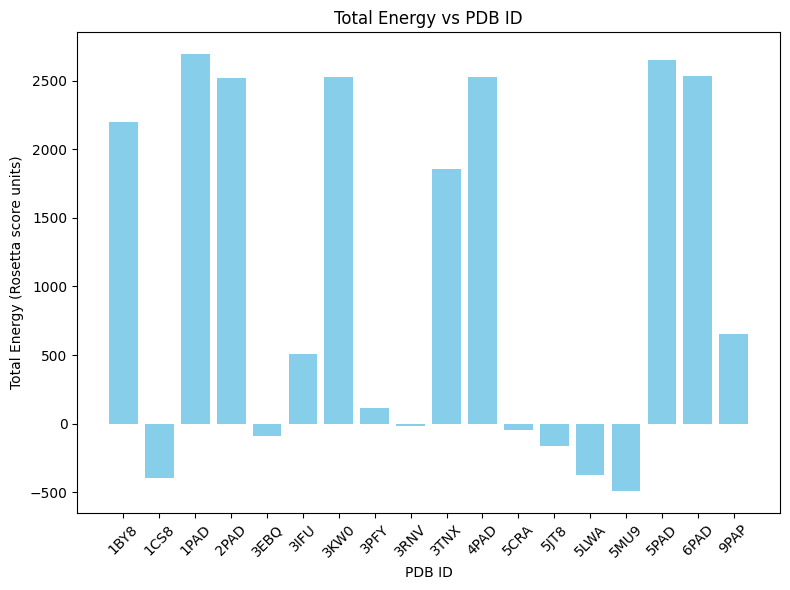

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(plcp_list, scores, color="skyblue")
plt.xlabel("PDB ID")
plt.ylabel("Total Energy (Rosetta score units)")
plt.title("Total Energy vs PDB ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
plcp_list=["9pap","3tnx","2pad","5pad","4pad","6pad","1by8","1pad"]


In [34]:
scorefxn = get_fa_scorefxn()   # ref2015 by default
scores = []

for pdb_id in plcp_list:
    pose = rcsb.pose_from_rcsb(pdb_id)
    score = scorefxn(pose)
    scores.append(score)
    print(f"{pdb_id}: {score}")


core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.import_pose.import_pose: File '9PAP.clean.pdb' automatically determined to be of type PDB from contents.
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 138
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 138
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 138
core.conformation.Conformation: Found disulfide between residues 22 62
core.conformation.Conformation: Found disulfide between residues 55 94
core.conformation.Conformation: Found disulfide between residues 152 199
core.pack.pack_missing_sidechains: packing residue number 138 because of missing atom number 7 atom name  CD
core.pack.task: Packer task: initialize from command line()
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.pack_rotamers: built 22 rotamers at 1 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating D

In [35]:
from pyrosetta import pose_from_file

# List of local PDB file paths
local_pdbs = ['1cs8sin.pdb', "5tj8.pdb", "5lwa.pdb"]

for pdb_path in local_pdbs:
    pose = pose_from_file(pdb_path)
    score = scorefxn(pose)
    scores.append(score)
    print(f"{pdb_path}: {score}")


core.import_pose.import_pose: File '1cs8sin.pdb' automatically determined to be of type PDB from contents.
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  N   in residue 1 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CA  in residue 1 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  C   in residue 1 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  O   in residue 1 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CB  in residue 1 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB 

In [29]:
ls

 1BY8.clean.pdb   3EBQ.pdb         3TNX.pdb         5MU9.clean.pdb
 1BY8.pdb         3IFU.clean.pdb   4PAD.clean.pdb   5MU9.pdb
 1CS8.clean.pdb   3IFU.pdb         4PAD.pdb         5PAD.clean.pdb
 1CS8.pdb         3KW0.clean.pdb   5CRA.clean.pdb   5PAD.pdb
'1cs8sin L.pdb'   3KW0.pdb         5CRA.pdb         5tj8.pdb
 1PAD.clean.pdb   3PFY.clean.pdb   5JT8.clean.pdb   6PAD.clean.pdb
 1PAD.pdb         3PFY.pdb         5JT8.pdb         6PAD.pdb
 2PAD.clean.pdb   3RNV.clean.pdb   5LWA.clean.pdb   9PAP.clean.pdb
 2PAD.pdb         3RNV.pdb         5lwa.pdb         9PAP.pdb
 3EBQ.clean.pdb   3TNX.clean.pdb   5LWA.pdb


In [22]:
pwd

'/content/drive/MyDrive/plcps'

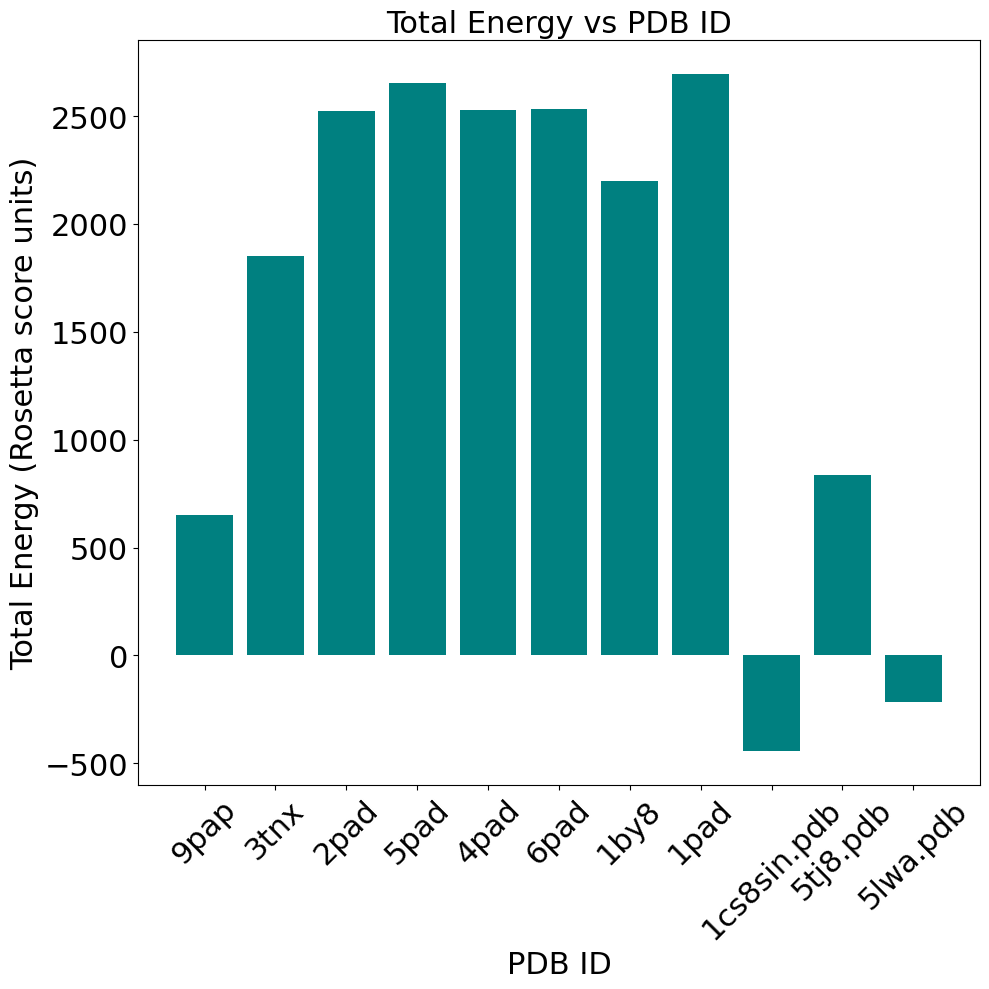

In [38]:
import matplotlib.pyplot as plt

# Combine all PDB identifiers: original + local
all_pdb_ids = plcp_list + local_pdbs  # local_pdbs should be a list of strings like ["local1.pdb", ...]

# Ensure the lengths match
assert len(all_pdb_ids) == len(scores), "Mismatch between PDB IDs and scores"

# Plot
plt.figure(figsize=(10,10))
plt.bar(all_pdb_ids, scores, color="teal")
plt.xlabel("PDB ID", fontsize=22)
plt.ylabel("Total Energy (Rosetta score units)", fontsize=22)
plt.title("Total Energy vs PDB ID", fontsize=22)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()


In [ ]:
from pyrosetta import *
from pyrosetta.teaching import *
from pyrosetta.rosetta.protocols.relax import FastRelax


scorefxn = get_fa_scorefxn()  # ref2015
relax = FastRelax()
relax.set_scorefxn(scorefxn)

scores = []

for pdb_id in plcp_list:
    pose = rcsb.pose_from_rcsb(pdb_id)
    relax.apply(pose)  # relax the pose
    score = scorefxn(pose)
    scores.append(score)
    print(f"{pdb_id} (relaxed): {score}")


core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.relax.RelaxScriptManager: Reading relax scripts list from database.
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.relax.RelaxScriptManager: Looking for MonomerRelax2019.txt
protocols.relax.RelaxScriptManager: ================== Reading script file: /usr/local/lib/python3.12/dist-packages/pyrosetta/database/sampling/relax_scripts/MonomerRelax2019.txt ==================
protocols.relax.RelaxScriptManager: repeat %%nrepeats%%
protocols.relax.RelaxScriptManager: coord_cst_weight 1.0
protocols.relax.RelaxScriptManager: scale:fa_rep 0.040
protocols.relax.RelaxScriptManager: repack
protocols.relax.RelaxScriptManager: scale:fa_rep 0.051
protocols.relax.RelaxScriptManager: min 0.01
protocols.relax.RelaxScriptManager: coord_cst_weight 0.5
protocols.relax.RelaxScriptManager: scale:fa_rep 0.265
protocols.relax.RelaxScriptManager: repack
protocols.relax.RelaxScriptManager: scale:fa_rep 0.280
protocols.relax.Re

In [ ]:


# List of local PDB file paths
local_pdbs = ['1cs8sin.pdb', '5tj8.pdb', '5lwa.pdb']

for pdb_path in local_pdbs:
    pose = pose_from_file(pdb_path)
    relax.apply(pose)  # relax the pose before scoring
    score = scorefxn(pose)
    scores.append(score)
    print(f"{pdb_path} (relaxed): {score}")


In [ ]:
import matplotlib.pyplot as plt

# Combine all PDB identifiers: original + local
all_pdb_ids = plcp_list + local_pdbs  # local_pdbs should be a list of strings like ["local1.pdb", ...]

# Ensure the lengths match
assert len(all_pdb_ids) == len(scores), "Mismatch between PDB IDs and scores"

# Plot
plt.figure(figsize=(10,10))
plt.bar(all_pdb_ids, scores, color="teal")
plt.xlabel("PDB ID", fontsize=22)
plt.ylabel("Total Energy (Rosetta score units)", fontsize=22)
plt.title("Total Energy vs PDB ID", fontsize=22)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()
